# Face Fecognition with SVM
source: https://www.pycodemates.com/2022/12/svm-for-face-recognition-using-python.html


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.utils import Bunch
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
Data shape:  (1136, 2914)
Image shape:  (1136, 62, 47)
Unique target:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


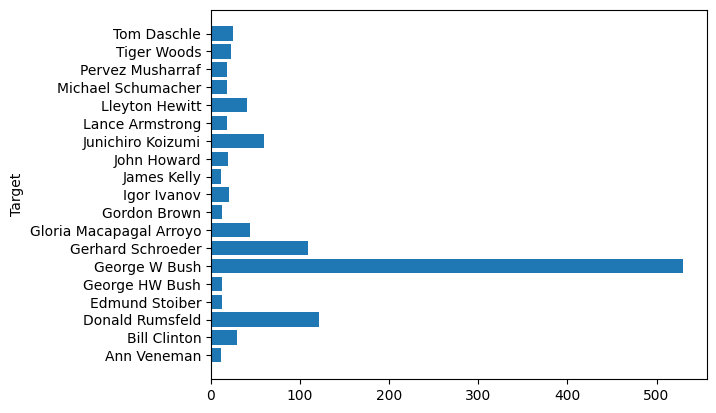

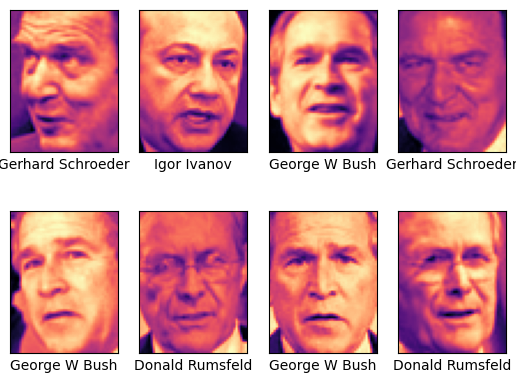

In [23]:
# faces: Bunch = fetch_lfw_people(min_faces_per_person=60)
faces: Bunch = fetch_lfw_people(min_faces_per_person=10, download_if_missing=True)
print(faces.keys())
print("Data shape: ", faces.data.shape)
print("Image shape: ", faces.images.shape)
print("Unique target: ", np.unique(faces.target))

faces.DESCR

# Show a graph of unique counts where the x-axis is the target and the y-axis is the count
targets, counts = np.unique(faces.target, return_counts=True)
plt.barh(targets, counts)
plt.yticks(targets, faces.target_names, rotation='horizontal')
plt.ylabel('Target')


fig, splts = plt.subplots(2, 4)
for i, splts in enumerate(splts.flat):
    splts.imshow(faces.images[i], cmap='magma')
    splts.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [27]:
# Splitting the dataset
X: np.array = faces.data
y: np.array = faces.target

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)

X train shape (908, 2914)
X test shape (228, 2914)


In [41]:
# For dimensionality reduction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=seed)
# svc = SVC(kernel='rbf', class_weight='balanced')
# Sigmoid with different alpha values
svc = SVC(kernel='sigmoid', class_weight='balanced', C=0.1, gamma=0.001)
model = make_pipeline(pca, svc)

In [42]:
start_time = time()
model.fit(X_train, y_train)
end_time = time()
print(f"Training time: {end_time - start_time}")

Training time: 4.983974933624268


In [43]:
# Testing the model
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

0.6491228070175439

                         precision    recall  f1-score   support

            Ann Veneman       0.00      0.00      0.00         3
           Bill Clinton       0.75      0.50      0.60         6
        Donald Rumsfeld       0.33      0.72      0.46        25
         Edmund Stoiber       0.00      0.00      0.00         4
         George HW Bush       0.00      0.00      0.00         4
          George W Bush       0.78      0.76      0.77       100
      Gerhard Schroeder       0.50      0.86      0.63        21
Gloria Macapagal Arroyo       1.00      0.87      0.93        15
           Gordon Brown       1.00      1.00      1.00         2
            Igor Ivanov       0.00      0.00      0.00         4
            James Kelly       0.00      0.00      0.00         3
            John Howard       0.00      0.00      0.00         6
      Junichiro Koizumi       1.00      0.83      0.91        12
        Lance Armstrong       1.00      0.50      0.67         2
         Lleyton Hewitt 

/Users/georgeli/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/georgeli/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/georgeli/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

<Axes: >

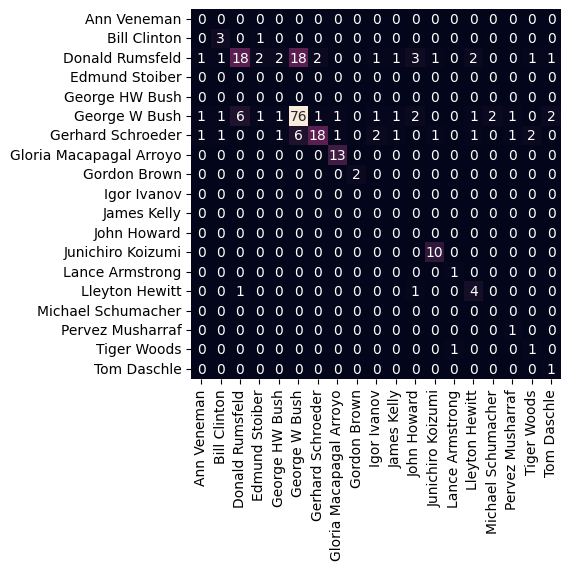

In [44]:
# Classification report
print(classification_report(y_test, predictions, target_names=faces.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)


In [8]:
# Compare it to a simple CNN model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
mlp = MLPClassifier(
    hidden_layer_sizes=(1024,), 
    batch_size=256, 
    max_iter=300, 
    random_state=seed
)
model = make_pipeline(scaler, mlp)


start_time = time()
model.fit(X_train, y_train)
end_time = time()
print("Training time: ", end_time - start_time)

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Training time:  6.31894588470459


0.9207317073170732